In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
ids = [[] for i in range(10)]
for i in range(len(y_train)):
  ids[y_train[i]].append(i)

In [ ]:

x_tr = []
y_tr = []
pis = [list(np.random.choice(ids[i], 200, replace=False)) for i in range(10)]

for i in pis:
  for j in i:
    x_tr.append(X_train[j])
    y_tr.append(y_train[j])

In [ ]:
ids = [[] for i in range(10)]
for i in range(len(y_test)):
  ids[y_test[i]].append(i)

In [ ]:

x_te = []
y_te = []
pis = [list(np.random.choice(ids[i], 100, replace=False)) for i in range(10)]

for i in pis:
  for j in i:
    x_te.append(X_test[j])
    y_te.append(y_test[j])

In [ ]:
X_train = np.array(x_tr)
X_test = np.array(x_te)

y_train = np.array(y_tr)
y_test = np.array(y_te)

(<matplotlib.image.AxesImage at 0x7ff045eea6d0>, 3)

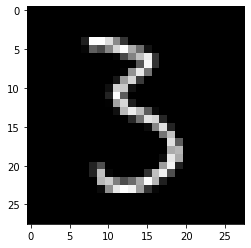

In [ ]:
plt.imshow(X_train[600], cmap='gray'), y_train[600]

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [ ]:
# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Noramlization from [0;255] to [0;1], Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255

In [ ]:
def neighborhood(j, r, m, t='l'):
  if t == 'l':
    res = []
    for i in range(m):
      if i >= j-r and i <= j+r:
        res.append(i)
    return res
  else:
    res = []
    for i in range(m):
      if (i%25) >= (j%25)-r and (i%25) <= (j%25)+r and int(i/25) >= int(j/25)-r and int(i/25) <= int(j/25)+r:
        res.append(i)
    return res

In [ ]:
def som(xs, t='l', m=625, r=0, a=0.6):
  ws = np.random.rand(len(xs[0].reshape(-1)),m)
  t = 0
  while t < 10:
    print('epoch ', t)
    print('a = ', a, ' r = ', r)
    for x in xs:
      itx = x.reshape(1,-1).T
      ds = np.sum((ws-itx)**2, axis=0)
      j = np.argmin(ds)
      js = neighborhood(j, r, m, t=t)
      for j in js:
        for i in range(ws.shape[0]):
          ws[i][j] += a*(itx[i][0]-ws[i][j])
    a *= 0.5
    r = int(r*0.5)
    t += 1
  
  return ws

In [ ]:
ws = som(X_train, t='l', m=625, r=0, a=0.6)

epoch  0
a =  0.6  r =  0
epoch  1
a =  0.3  r =  0
epoch  2
a =  0.15  r =  0
epoch  3
a =  0.075  r =  0
epoch  4
a =  0.0375  r =  0
epoch  5
a =  0.01875  r =  0
epoch  6
a =  0.009375  r =  0
epoch  7
a =  0.0046875  r =  0
epoch  8
a =  0.00234375  r =  0
epoch  9
a =  0.001171875  r =  0


In [ ]:
def predict(xa, ya, ws):
  res = [[] for i in range(ws.shape[1])]
  for i, x in enumerate(xa):
      itx = x.reshape(1,-1).T
      ds = np.sum((ws-itx)**2, axis=0)
      j = np.argmin(ds)
      res[j].append(ya[i])

  return res

In [ ]:
preds = predict(X_test, y_test, ws)

In [ ]:
import pandas as pd

clusters = []
for i in preds:
  if len(i) > 0:
    clusters.append(i)

pd.DataFrame(clusters)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,9,8,2,5,6,9,0,2,3,7,4,5,7,2,5,0,9,1,0,0,0,4,3,3,8,7,0,1,7,0,8,7,6,7,4,7,9,3,9,2,...,0,8,4,4,8,7,7,1,9,7,0,8,5,6,8,9,1,0,5,4,7,3,3,6,4,0,5,8,7,2,7,0,3,7,7,8,1,6,5,6


In [ ]:
ws = som(X_train, t='l', m=625, r=2, a=0.6)

epoch  0
a =  0.6  r =  2
epoch  1
a =  0.3  r =  1
epoch  2
a =  0.15  r =  0
epoch  3
a =  0.075  r =  0
epoch  4
a =  0.0375  r =  0
epoch  5
a =  0.01875  r =  0
epoch  6
a =  0.009375  r =  0
epoch  7
a =  0.0046875  r =  0
epoch  8
a =  0.00234375  r =  0
epoch  9
a =  0.001171875  r =  0


In [ ]:
preds = predict(X_test, y_test, ws)

In [ ]:
import pandas as pd

clusters = []
for i in preds:
  if len(i) > 0:
    clusters.append(i)

pd.DataFrame(clusters)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,6,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,8,8.0,8.0,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
415,8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,2,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,8,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ws = som(X_train, t='s', m=625, r=1, a=0.6)

epoch  0
a =  0.6  r =  1
epoch  1
a =  0.3  r =  0
epoch  2
a =  0.15  r =  0
epoch  3
a =  0.075  r =  0
epoch  4
a =  0.0375  r =  0
epoch  5
a =  0.01875  r =  0
epoch  6
a =  0.009375  r =  0
epoch  7
a =  0.0046875  r =  0
epoch  8
a =  0.00234375  r =  0
epoch  9
a =  0.001171875  r =  0


In [ ]:
preds_s = predict(X_test, y_test, ws)

In [ ]:
clusters = []
for i, v in enumerate(preds_s):
  if len(v) > 0:
    clusters.append(i)

(<matplotlib.image.AxesImage at 0x7ff03b00d7d0>, [2, 2, 2, 2])

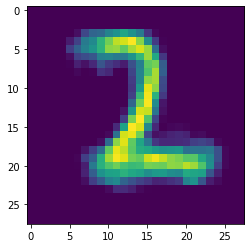

In [ ]:
plt.imshow(ws[:,clusters[20]].reshape(28,28)), preds_s[clusters[20]]

(<matplotlib.image.AxesImage at 0x7ff03b0c23d0>, [4, 4, 4, 4, 4, 4])

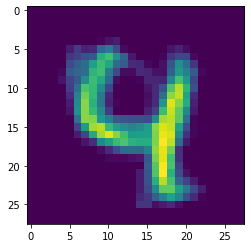

In [ ]:
plt.imshow(ws[:,clusters[10]].reshape(28,28)), preds_s[clusters[10]]

(<matplotlib.image.AxesImage at 0x7ff03b10c390>, [9, 4, 4, 9, 4, 9])

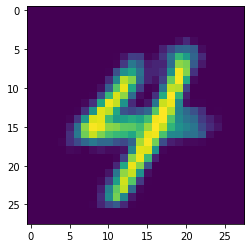

In [ ]:
plt.imshow(ws[:,clusters[6]].reshape(28,28)), preds_s[clusters[6]]